In [101]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
# import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 20

train = pd.read_csv('./Dacon/train.csv')
# test = pd.read_csv('../input/train.csv')

# quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
# quantitative.remove('SalePrice')
# quantitative.remove('Id')
# qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

## Data info

In [108]:
train['address_by_law'] = train['address_by_law'].astype(str)

In [109]:
seoul = train.loc[:][train['city'] == 1]
seoul

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.4300,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.3700,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.7000,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.6600,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.6200,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000
5,5,2815,1,200601,11~20,2000,84.9200,9,37.575381,126.960804,...,10.0,individual,gas,5831,109.88,454,3.0,2.0,stairway,415000000
6,6,2815,1,200601,11~20,2000,60.0000,13,37.575381,126.960804,...,10.0,individual,gas,5833,84.33,207,3.0,1.0,corridor,267000000
7,7,9867,1,200601,11~20,2005,84.7600,10,37.559200,127.019503,...,6.0,individual,gas,11862,104.30,82,3.0,2.0,stairway,415000000
8,8,2818,1,200601,11~20,1999,84.8800,18,37.555060,127.014495,...,8.0,individual,gas,5843,107.65,576,3.0,2.0,stairway,310000000
9,9,2817,1,200601,11~20,2002,59.9400,12,37.549828,127.009284,...,11.0,individual,gas,5842,85.90,864,3.0,1.0,corridor,319000000


In [110]:
with open('dacon_kb.txt','rb') as f:
    whole_data = pickle.load(f)

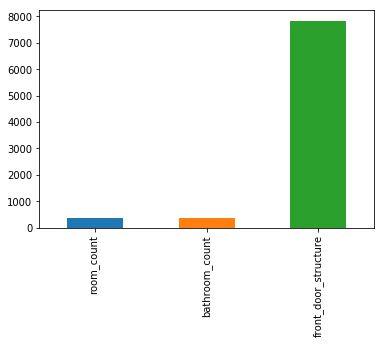

In [111]:
missing = whole_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

### Remove deal_date column

In [112]:
whole_data = whole_data.drop('deal_date', 1)

### extract GuanAk

In [113]:
guanak = whole_data.loc[:][whole_data['loc_code_x'] == '11620']

In [ ]:
guanak = guanak.drop('loc_code_x', 1)

In [46]:
guanak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32783 entries, 443629 to 862754
Data columns (total 60 columns):
deal_price                            32783 non-null int64
deal_year                             32783 non-null object
deal_month                            32783 non-null object
dong                                  32783 non-null int64
area                                  32783 non-null int64
current_floor                         32783 non-null int64
total_unit                            32783 non-null int64
total_building                        32783 non-null int64
max_floor                             32783 non-null int64
min_floor                             32783 non-null int64
total_parking                         32783 non-null int64
unit_parking                          32783 non-null int64
conv_lists                            32783 non-null int64
medi_lists                            32783 non-null int64
park_lists                            32783 non-null int6

In [ ]:
guanak.loc[:, 'temp_year'] = guanak[]

In [42]:
guanak.iloc[0]

deal_price                                 16900
deal_year                                   2006
deal_month                                     1
loc_code_x                                 11620
dong                                           2
area                                          59
current_floor                                  3
total_unit                                  1597
total_building                                 8
max_floor                                     29
min_floor                                     12
total_parking                               1803
unit_parking                                   1
conv_lists                                     1
medi_lists                                     1
park_lists                                     1
road_lists                                     0
kindergarten                                   5
elementary_school                              1
middle_school                                  1
high_school         

## Quality vs Quantity

/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


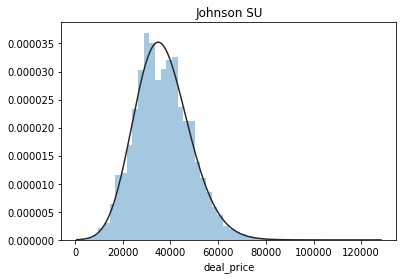

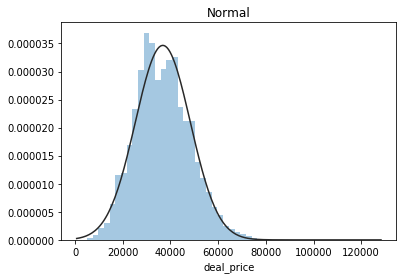

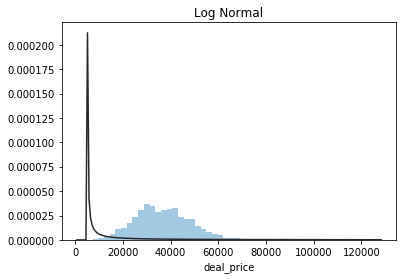

In [36]:
import scipy.stats as st
y = guanak['deal_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# Keras Test

In [49]:
import keras

Using TensorFlow backend.


In [51]:
import pandas as pd
import pickle
import numpy as np

In [64]:
with open('final_total_data.txt', 'rb') as f:
  dataset = pickle.load(f)

In [74]:
dataset.head()

,deal_price,deal_year,deal_month,loc_code_x,dong,area,current_floor,total_unit,total_building,max_floor,...,S-LineJA,S-LineAir,distance,cont_rank,com_year,com_mon,avg_price,sub_num,bldg_age,lv_fg
0,29500,2006,1,11110,19,93,6,72,1,10,...,0,0,582,1000,1983,6,315,3,23,4
1,28000,2006,4,11110,19,104,3,72,1,10,...,0,0,582,1000,1983,6,267,3,23,7
2,64560,2006,9,11110,19,156,9,72,1,10,...,0,0,582,1000,1983,6,411,3,23,1
3,17000,2006,11,11110,19,91,4,72,1,10,...,0,0,582,1000,1983,6,185,3,23,6
4,43200,2007,1,11110,19,105,7,72,1,10,...,0,0,582,1000,1983,6,411,3,24,3


In [75]:
gang_dataset = dataset.loc[:][dataset['loc_code_x'] == 11680]
seocho_dataset = dataset.loc[:][dataset['loc_code_x'] == 11650]

In [76]:
from sklearn.utils import shuffle

In [77]:
gang_dataset = shuffle(gang_dataset)
seocho_dataset = shuffle(seocho_dataset)

In [78]:
g_msk = np.random.rand(len(gang_dataset)) < 0.8

gang_train = gang_dataset[g_msk]

gang_test = gang_dataset[~g_msk]

In [79]:
s_msk = np.random.rand(len(seocho_dataset)) < 0.8

seocho_train = seocho_dataset[s_msk]

seocho_test = seocho_dataset[~s_msk]

In [80]:
gang_train_targets = gang_train['avg_price']
gang_test_targets = gang_test['avg_price']

In [81]:
gang_train = gang_train.drop('avg_price', axis=1)
gang_test = gang_test.drop('avg_price', axis=1)
gang_train = gang_train.drop('deal_price', axis=1)
gang_test = gang_test.drop('deal_price', axis=1)

In [73]:
# mean = gang_train.mean(axis=0)
# std = gang_train.std(axis=0)

# gang_train -= mean
# gang_train /= std

In [62]:
# gang_test -= mean
# gang_test /= std

In [82]:
gang_test.head()

,deal_year,deal_month,loc_code_x,dong,area,current_floor,total_unit,total_building,max_floor,min_floor,...,S-LineGC,S-LineJA,S-LineAir,distance,cont_rank,com_year,com_mon,sub_num,bldg_age,lv_fg
536336,2012,9,11680,3,115,6,1203,10,14,14,...,0,0,0,563,1000,1983,10,2,29,8
536473,2013,5,11680,3,126,12,1232,11,14,14,...,0,0,0,563,1000,1984,11,2,29,2
840584,2018,1,11680,4,155,8,72,3,9,8,...,0,0,0,806,1000,2007,4,2,11,1
964171,2016,3,11680,13,91,12,1020,20,15,15,...,0,0,0,714,1000,2014,6,1,2,3
764453,2017,4,11680,2,244,1,16,1,9,7,...,0,0,0,714,1000,1997,12,3,20,8


In [86]:
gang_test.isnull().any()

deal_year            False
deal_month           False
loc_code_x           False
dong                 False
area                 False
current_floor        False
total_unit           False
total_building       False
max_floor            False
min_floor            False
total_parking        False
unit_parking         False
conv_lists           False
medi_lists           False
park_lists           False
road_lists           False
kindergarten         False
elementary_school    False
middle_school        False
high_school          False
university           False
etc_lists            False
S-Line1              False
S-Line2              False
S-Line3              False
S-Line4              False
S-Line5              False
S-Line6              False
S-Line7              False
S-Line8              False
S-Line9              False
S-LineBD             False
S-LineNBD            False
S-LineGC             False
S-LineJA             False
S-LineAir            False
distance             False
c

In [87]:
from keras import models
from keras import layers

In [88]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(gang_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['acc'])
    
    return model

In [90]:
from keras.callbacks import EarlyStopping

Train on 44541 samples, validate on 4950 samples
Epoch 1/500
 - 7s - loss: 127074.4483 - acc: 0.0013 - val_loss: 102743.1314 - val_acc: 0.0022
Epoch 2/500
 - 6s - loss: 108551.2653 - acc: 0.0013 - val_loss: 108630.7338 - val_acc: 0.0014
Epoch 3/500
 - 6s - loss: 101735.3643 - acc: 0.0013 - val_loss: 90843.4570 - val_acc: 0.0012
Epoch 4/500
 - 6s - loss: 97246.8190 - acc: 0.0013 - val_loss: 98364.7900 - val_acc: 0.0026
Epoch 5/500
 - 5s - loss: 94596.2744 - acc: 0.0012 - val_loss: 87354.6477 - val_acc: 0.0030
Epoch 6/500
 - 6s - loss: 92319.5554 - acc: 0.0014 - val_loss: 97714.1481 - val_acc: 0.0020
Epoch 7/500
 - 6s - loss: 90434.3466 - acc: 0.0019 - val_loss: 80316.6862 - val_acc: 0.0014
Epoch 8/500
 - 6s - loss: 89059.2570 - acc: 0.0018 - val_loss: 91849.5572 - val_acc: 0.0020
Epoch 9/500
 - 6s - loss: 87602.9346 - acc: 0.0012 - val_loss: 154359.4017 - val_acc: 0.0012
Epoch 10/500
 - 5s - loss: 86368.2365 - acc: 0.0015 - val_loss: 102275.5165 - val_acc: 0.0022
Epoch 11/500
 - 5s - lo

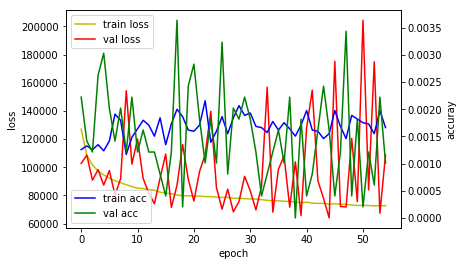

In [97]:
model = build_model()
# 4. 모델 학습시키기



early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=2)
# hist = model.fit(gang_train, gang_train_targets, epochs=1000, batch_size=10, verbose=2, validation_data=(gang_val, gang_val_targets), callbacks=[early_stopping])
hist = model.fit(gang_train, gang_train_targets, epochs=500, batch_size=10, verbose=2, callbacks=[early_stopping], validation_split=0.1)
print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])
# test_mse_score, test_mae_score, test_acc_score = model.evaluate(gang_test, gang_test_targets)


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [98]:
y_pre = model.predict(gang_test, batch_size= 10)

In [99]:
y_pre[:10]

array([[1153.1063 ],
       [1114.9673 ],
       [ 678.8656 ],
       [ 891.47003],
       [ 768.9721 ],
       [ 679.6501 ],
       [1413.404  ],
       [ 794.74756],
       [1208.846  ],
       [ 907.25415]], dtype=float32)

In [100]:
gang_test_targets[:10]

536336    1063
536473    1092
840584     961
964171    1125
764453     551
541389     523
522122    1414
555526    1068
548806    1675
561727     957
Name: avg_price, dtype: int64

In [93]:
model_json = model.to_json()
with open("guanak_model.json", "w") as json_file : 
    json_file.write(model_json)

In [94]:
model.save_weights("guanak_model.h5")

In [95]:
from keras.models import model_from_json
json_file = open("guanak_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [96]:
loaded_model.load_weights("guanak_model.h5")

In [ ]:
loaded_model.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
loaded_model.fit(gang_train, gang_train_targets, epochs=200, batch_size=16, verbose=2)
test_mse_score, test_mae_score = model.evaluate(gang_test, gang_test_targets)
# model evaluation
# score = loaded_model.evaluate(,Y,verbose=2)

# print("%s : %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))